In [1]:
! sudo pip install pandas
! sudo pip install matplotlib
! sudo apt-get -y install python3-tk

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following extra packages will be installed:
  blt libtcl8.6 libtk8.6 libxft2 libxss1
Suggested packages:
  blt-demo tcl8.6 tk8.6 tix python3-tk-dbg
The following NEW packages will be installed:
  blt libtcl8.6 libtk8.6 libxft2 libxss1 python3-tk
0 upgraded, 6 newly installed, 0 to remove and 0 not upgraded.
Need to get 2,151 kB of archives.
After this operation, 8,963 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu/ trusty/main libtcl8.6 amd64 8.6.1-4ubuntu1 [841 kB]
Get:2 http://archive.ubuntu.com/ubuntu/ trusty/main libxft2 amd64 2.3.1-2 [36.2 kB]
Get:3 http://archive.ub

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("./data/enwiki.draft_quality.75_not_OK_sample.censored.tsv", sep="\t")

In [4]:
df.head()

,page_title,rev_id,creation_timestamp,archived,draft_quality,censored_text
0,Government_Achuthan_girls_hss,688249460,20151030165831,1,spam,125 years ago APPU NEDUNGADI STARTED THIS SCH...
1,Spiromax_EDMS,731688963,20160726220726,1,spam,Spiromax is a British technology media and com...
2,Steph_Curry_UA_2,693824273,20151205035603,1,spam,The Steph Curry UA two Shoes are a hot-selling...
3,Valletta_Cruise_Port,722151405,20160526085302,1,spam,''Valletta Cruise Port plc''' is a private com...
4,RWG_Mobile,731355950,20160724204124,1,spam,[[File:RWGmobile.png|thumb|RWG Mobile logo]]\n...


In [5]:
df["len_text"] = df["censored_text"].apply(len)

In [6]:
df.head()

,page_title,rev_id,creation_timestamp,archived,draft_quality,censored_text,len_text
0,Government_Achuthan_girls_hss,688249460,20151030165831,1,spam,125 years ago APPU NEDUNGADI STARTED THIS SCH...,195
1,Spiromax_EDMS,731688963,20160726220726,1,spam,Spiromax is a British technology media and com...,989
2,Steph_Curry_UA_2,693824273,20151205035603,1,spam,The Steph Curry UA two Shoes are a hot-selling...,543
3,Valletta_Cruise_Port,722151405,20160526085302,1,spam,''Valletta Cruise Port plc''' is a private com...,2980
4,RWG_Mobile,731355950,20160724204124,1,spam,[[File:RWGmobile.png|thumb|RWG Mobile logo]]\n...,2099


In [7]:
find_urls = lambda x: re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)

In [8]:
df["urls"] = df["censored_text"].apply(find_urls)

In [9]:
df.head()

,page_title,rev_id,creation_timestamp,archived,draft_quality,censored_text,len_text,urls
0,Government_Achuthan_girls_hss,688249460,20151030165831,1,spam,125 years ago APPU NEDUNGADI STARTED THIS SCH...,195,[https://www.facebook.com/groups/4806262819778...
1,Spiromax_EDMS,731688963,20160726220726,1,spam,Spiromax is a British technology media and com...,989,[]
2,Steph_Curry_UA_2,693824273,20151205035603,1,spam,The Steph Curry UA two Shoes are a hot-selling...,543,[]
3,Valletta_Cruise_Port,722151405,20160526085302,1,spam,''Valletta Cruise Port plc''' is a private com...,2980,[https://www.youtube.com/watch?v=FMThbEG95WA</...
4,RWG_Mobile,731355950,20160724204124,1,spam,[[File:RWGmobile.png|thumb|RWG Mobile logo]]\n...,2099,[https://www.rwgmobile.wales/about-rwg/</ref>....


In [10]:
df["draft_quality"].unique()

array(['spam', 'attack', 'vandalism'], dtype=object)

In [11]:
df["count_urls"] = df["urls"].apply(len)

In [12]:
df.head()

,page_title,rev_id,creation_timestamp,archived,draft_quality,censored_text,len_text,urls,count_urls
0,Government_Achuthan_girls_hss,688249460,20151030165831,1,spam,125 years ago APPU NEDUNGADI STARTED THIS SCH...,195,[https://www.facebook.com/groups/4806262819778...,1
1,Spiromax_EDMS,731688963,20160726220726,1,spam,Spiromax is a British technology media and com...,989,[],0
2,Steph_Curry_UA_2,693824273,20151205035603,1,spam,The Steph Curry UA two Shoes are a hot-selling...,543,[],0
3,Valletta_Cruise_Port,722151405,20160526085302,1,spam,''Valletta Cruise Port plc''' is a private com...,2980,[https://www.youtube.com/watch?v=FMThbEG95WA</...,3
4,RWG_Mobile,731355950,20160724204124,1,spam,[[File:RWGmobile.png|thumb|RWG Mobile logo]]\n...,2099,[https://www.rwgmobile.wales/about-rwg/</ref>....,3


In [13]:
spams = list(df[df.draft_quality == "spam"]["count_urls"])
attacks = list(df[df.draft_quality == "attack"]["count_urls"])
vandalisms = list(df[df.draft_quality == "vandalism"]["count_urls"])

In [14]:
data_to_plot = [spams, attacks, vandalisms]

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


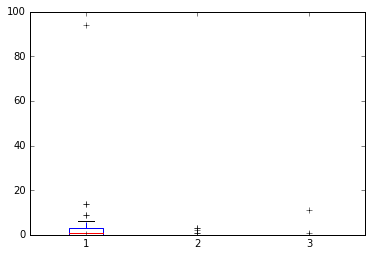

In [21]:
# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Display the figure
fig.show()

In [22]:
df["censored_text"]

0     125 years ago APPU NEDUNGADI  STARTED THIS SCH...
1     Spiromax is a British technology media and com...
2     The Steph Curry UA two Shoes are a hot-selling...
3     ''Valletta Cruise Port plc''' is a private com...
4     [[File:RWGmobile.png|thumb|RWG Mobile logo]]\n...
5     Transfer your files from anywhere to anywhere\...
6     {{Infobox organization\n| name   = The HeroesT...
7     Victor Jerome Beasley Jr (born July 18, 1981),...
8     ''<big>suresh Kumar Mishra 'Uratrupt'</big>'''...
9      == ABOUT KAMRUL HASAN KOFIL (KHK) ==\n\n* Ful...
10    [http://Localizer.co Localizer.co] is a softwa...
11    [http://www.justjoce.com/faq.html#0 Ginger Ros...
12    <!-- Don't mess with this line! -->{{New unrev...
13    Trailer Park Boys Mobile Game\n\nComing Spring...
14    Tana Monceau is a youtube star, with over 1,34...
15    {{AFC submission|t||ts=20160324040906|u=Yongsh...
16    This book was written by a group called DICE w...
17    ''[http://www.baselinemag.com/ Baseline]''

In [40]:
w = ["4U","Claims you are a winner","For instant access","Accept credit cards","Claims you registered with Some Kind of Partner","For just $ (some amt)","Act now! Don’t hesitate!","Click below","Free access","Additional income","Click here link","Free cell phone","Addresses on CD","Click to remove","Free consultation","All natural","Click to remove mailto","Free DVD","Amazing","Compare rates","Free grant money","Apply Online","Compete for your business","Free hosting","As seen on","Confidentially on all orders","Free installation","Auto email removal","Congratulations","Free investment","Avoid bankruptcy","Consolidate debt and credit","Free leads","Be amazed","Copy accurately","Free membership","Be your own boss","Copy DVDs","Free money","Being a member","Credit bureaus","Free offer","Big bucks","Credit card offers","Free preview","Bill 1618","Cures baldness","Free priority mail","Billing address","Dear email","Free quote","Billion dollars","Dear friend","Free sample","Brand new pager","Dear somebody","Free trial","Bulk email","Different reply to","Free website","Buy direct","Dig up dirt on friends","Full refund","Buying judgments","Direct email","Get It Now","Cable converter","Direct marketing","Get paid","Call free","Discusses search engine listings","Get started now","Call now","Do it today","Gift certificate","Calling creditors","Don’t delete","Great offer","Can’t live without","Drastically reduced","Guarantee","Cancel at any time","Earn per week","Have you been turned down?","Cannot be combined with any other offer","Easy terms","Hidden assets","Cash bonus","Eliminate bad credit","Home employment","Cashcashcash","Email harvest","Human growth hormone","Casino","Email marketing","If only it were that easy","Cell phone cancer scam","Expect to earn","In accordance with laws","Cents on the dollar","Fantastic deal","Increase sales","Check or money order","Fast Viagra delivery","Increase traffic","Claims not to be selling anything","Financial freedom","Insurance","Claims to be in accordance with some spam law","Find out anything","Investment decision","Claims to be legal","For free","It's effective","Join millions of Americans","No questions asked","Reverses aging","Laser printer","No selling","Risk free","Limited time only","No strings attached","Round the world","Long distance phone offer","Not intended","S 1618","Lose weight spam","Off shore","Safeguard notice","Lower interest rates","Offer expires","Satisfaction guaranteed","Lower monthly payment","Offers coupon","Save $","Lowest price","Offers extra cash","Save big money","Luxury car","Offers free (often stolen) passwords","Save up to","Mail in order form","Once in lifetime","Score with babes","Marketing solutions","One hundred percent free","Section 301","Mass email","One hundred percent guaranteed","See for yourself","Meet singles","One time mailing","Sent in compliance","Member stuff","Online biz opportunity","Serious cash","Message contains disclaimer","Online pharmacy","Serious only","MLM","Only $","Shopping spree","Money back","Opportunity","Sign up free today","Money making","Opt in","Social security number","Month trial offer","Order now","Special promotion","More Internet traffic","Order status","Stainless steel","Mortgage rates","Orders shipped by priority mail","Stock alert","Multi level marketing","Outstanding values","Stock disclaimer statement","Name brand","Pennies a day","Stock pick","New customers only","People just leave money laying around","Stop snoring","New domain extensions","Please read","Strong buy","Nigerian","Potential earnings","Stuff on sale","No age restrictions","Print form signature","Subject to credit","No catch","Print out and fax","Supplies are limited","No claim forms","Produced and sent out","Take action now","No cost","Profits","Talks about hidden charges","No credit check","Promise you …!","Talks about prizes","No disappointment","Pure profit","Tells you it’s an ad","No experience","Real thing","Terms and conditions","No fees","Refinance home","The best rates","No gimmick","Removal instructions","The following form","No inventory","Remove in quotes","They keep your money — no refund!","No investment","Remove subject","They’re just giving it away","No medical exams","Removes wrinkles","This isn’t junk","No middleman","Reply remove subject","This isn’t spam","No obligation","Requires initial investment","University diplomas","No purchase necessary","Reserves the right","Unlimited","Unsecured credit/debt","We honor all","Will not believe your eyes","Urgent","Weekend getaway","Winner","US dollars","What are you waiting for?","Winning","Vacation offers","While supplies last","Work at home","Viagra and other drugs","While you sleep","You have been selected","Wants credit card","Who really wins?","Your income","We hate spam","Why pay more?"]

In [41]:
w = [word.lower() for word in w]

In [45]:
df["nb_spam_word"] = df["censored_text"].apply(lambda x: np.sum([x.lower().count(word) for word in w] ))

In [46]:
df["freq_spam_word"] = df["nb_spam_word"] / df["len_text"]

In [47]:
df["freq_spam_word"]

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000797
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000163
12    0.000000
13    0.000000
14    0.000000
15    0.000244
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.004876
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000027
29    0.000000
        ...   
45    0.000000
46    0.000000
47    0.000000
48    0.000000
49    0.000000
50    0.000000
51    0.000000
52    0.000000
53    0.000000
54    0.000000
55    0.000000
56    0.000000
57    0.000000
58    0.000738
59    0.000000
60    0.000000
61    0.000000
62    0.000000
63    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.001115
73    0.000000
74    0.000000
Name: freq_spam_word, dtype: float64